In [1]:
import numpy as np
import matplotlib.pyplot as plt

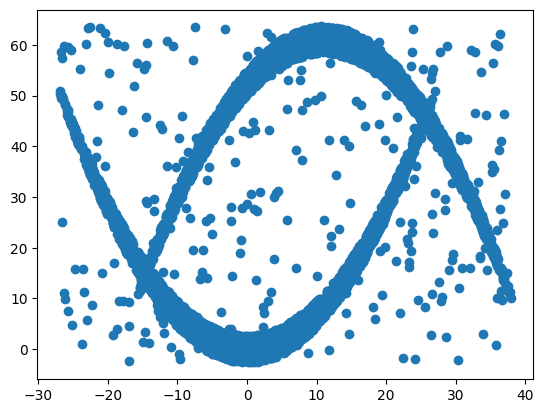

In [2]:
f = open("hs.dat")
d = []
for i in f:
  d.append([float(x) for x in i.split()])
d = np.array(d)
f.close()
plt.scatter(d[:, 0], d[:, 1])
plt.show()
x0 = d[:, 0]
x1 = d[:, 1]


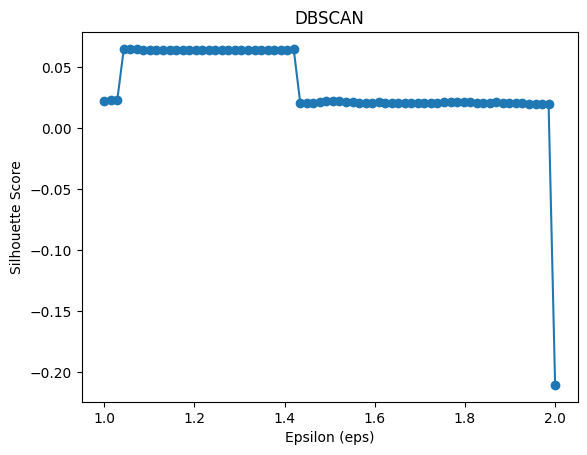

Оптимальный epsilon: 1.0579710144927537
Лучший Silhouette Score: 0.06504763055186889
Количество найденных кластеров: 2


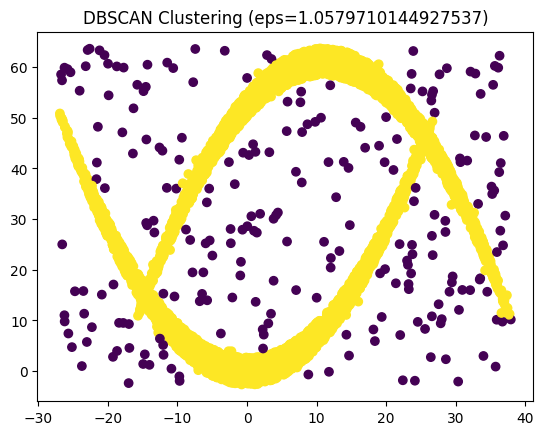

In [3]:
#1. DBSCAN + Silhouette Score
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

silhouette_scores = []
best_score = -1
best_eps = -1
best_labels = None

for eps in np.linspace(1, 2, 70):
  clf = DBSCAN(eps=eps)
  labels = clf.fit_predict(d)
  if len(np.unique(labels)) > 1:
    score = silhouette_score(d, labels)
    silhouette_scores.append(score)
    if score > best_score:
      best_score = score
      best_eps = eps
      best_labels = labels
  else:
    silhouette_scores.append(-1)
    
plt.plot(np.linspace(1, 2, 70), silhouette_scores, marker='o', linestyle='-')
plt.title("DBSCAN")
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.show()

print(f"Оптимальный epsilon: {best_eps}")
print(f"Лучший Silhouette Score: {best_score}")
print(f"Количество найденных кластеров: {len(np.unique(best_labels))}")

plt.title(f"DBSCAN Clustering (eps={best_eps})")
plt.scatter(x0, x1, c=best_labels)
plt.show()

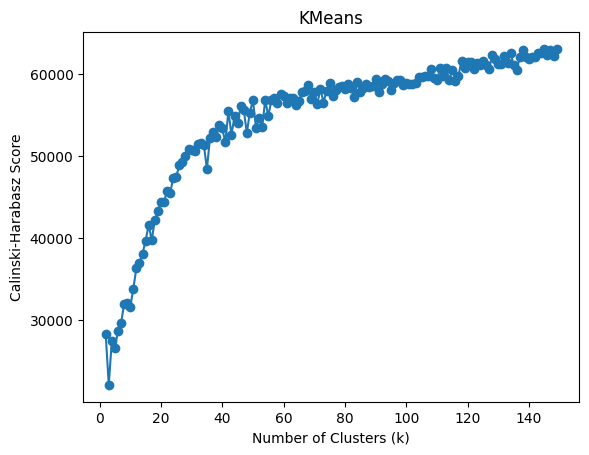

Оптимальное кол-во кластеров: 145
Лучший Calinski-Harabasz Score: 63056.96053864643


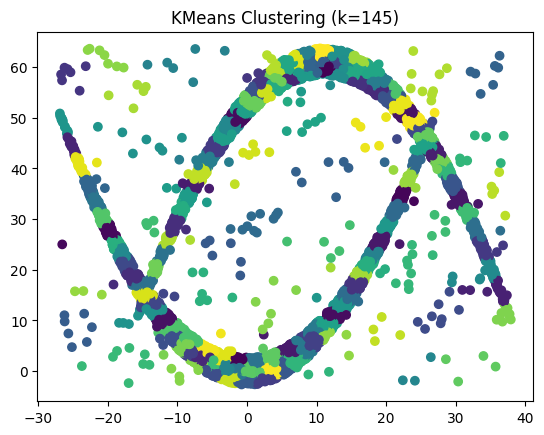

In [4]:
#2. KMeans + Calinski-Harabasz Score
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
best_score = -1
best_n_clusters = -1
best_labels = None

for n_clusters in range(2, 150):
  clf = KMeans(n_clusters=n_clusters)
  labels = clf.fit_predict(d)
  score = calinski_harabasz_score(d, labels)
  ch_scores.append(score)
  if score > best_score:
    best_score = score
    best_n_clusters = n_clusters
    best_labels = labels

plt.plot(range(2, 150), ch_scores, marker='o', linestyle='-')
plt.title("KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

print(f"Оптимальное кол-во кластеров: {best_n_clusters}")
print(f"Лучший Calinski-Harabasz Score: {best_score}")
plt.title(f"KMeans Clustering (k={best_n_clusters})")
plt.scatter(x0, x1, c=best_labels)
plt.show()

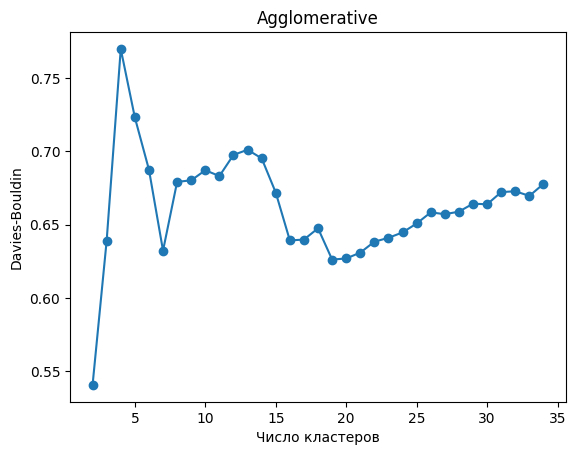

Оптимальное число кластеров: 2
Лучший Davies-Bouldin: 0.5408144292222365


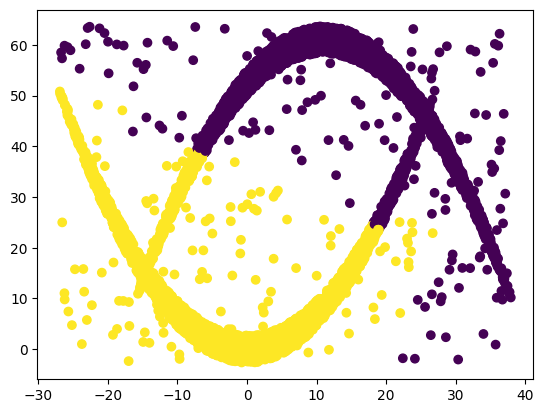

In [5]:
#3. AgglomerativeClustering + Davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

db_scores = []
best_score = float('inf')
best_n = None
best_labels = None

for n in range(2, 35):
    clf = AgglomerativeClustering(n_clusters=n)
    labels = clf.fit_predict(d)
    score = davies_bouldin_score(d, labels)
    db_scores.append(score)
    if score < best_score:
        best_score = score
        best_n = n
        best_labels = labels

plt.plot(range(2, 35), db_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Davies-Bouldin')
plt.title('Agglomerative')
plt.show()

print(f'Оптимальное число кластеров: {best_n}')
print(f'Лучший Davies-Bouldin: {best_score}')
plt.scatter(x0, x1, c=best_labels)
plt.show()

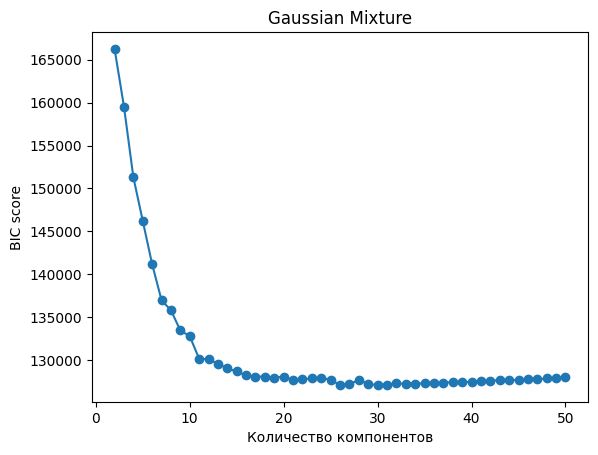

Оптимальное кол-во компонентов: 26
Лучший BIC Score: 127101.3763779524


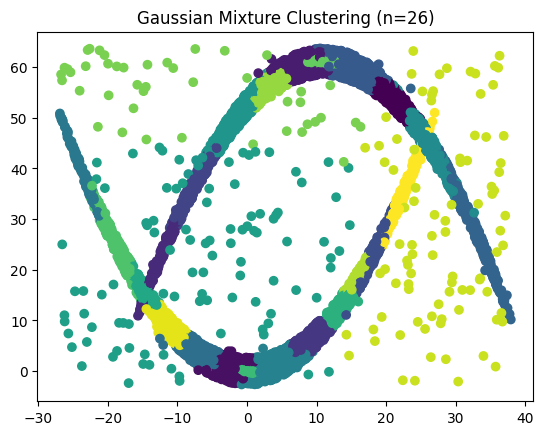

In [6]:
# 4. Gaussian Mixture + BIC
# BIC является методом самого объекта GaussianMixture в sklearn
from sklearn.mixture import GaussianMixture
bic_scores = []
best_score = float('inf')
best_n_components = -1
best_labels = None

for n_components in range(2, 51):
  clf = GaussianMixture(n_components = n_components)
  labels = clf.fit_predict(d)
  score = clf.bic(d)
  bic_scores.append(score)
  if score < best_score:
    best_score = score
    best_n_components = n_components
    best_labels = labels

plt.plot(range(2, 51), bic_scores, marker = 'o', linestyle = '-')
plt.title("Gaussian Mixture")
plt.xlabel("Количество компонентов")
plt.ylabel("BIC score")
plt.show()

print(f"Оптимальное кол-во компонентов: {best_n_components}")
print(f"Лучший BIC Score: {best_score}")

plt.title(f"Gaussian Mixture Clustering (n={best_n_components})")
plt.scatter(x0, x1, c=best_labels)
plt.show()

GMSDB
Количество найденных кластеров: 3


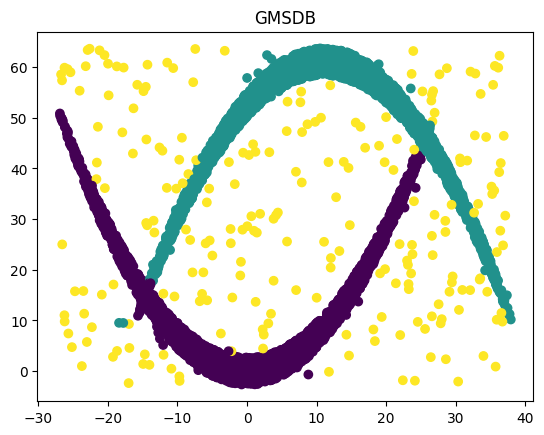

In [7]:
# 5. GMSDB
from gmsdb import GMSDB
clf = GMSDB(n_components=15)
True_labels = clf.fit_predict(d)

print("GMSDB")
print(f"Количество найденных кластеров: {len(np.unique(True_labels))}")
plt.title("GMSDB")
plt.scatter(x0, x1, c = True_labels)
plt.show()




Тут мы сталкиваемся с проблемой, то что метрики которые не требует истинных меток закончились.
Далее мы будем использовать метки, полученные с помощью GMSDB(Так как он довольно хорошо кластеризует наши метки), как эталонные (истинные) для оценки качества кластеризации других алгоритмов.

ТЗ я по логике не нарушаю так как я не комбинирую алгоритмы, а просто беру заранее готовое решение задачи и кладу его в переменную.

Оптимальный eps: 2
Лучший Silhouette Score: -0.0017564919230050413


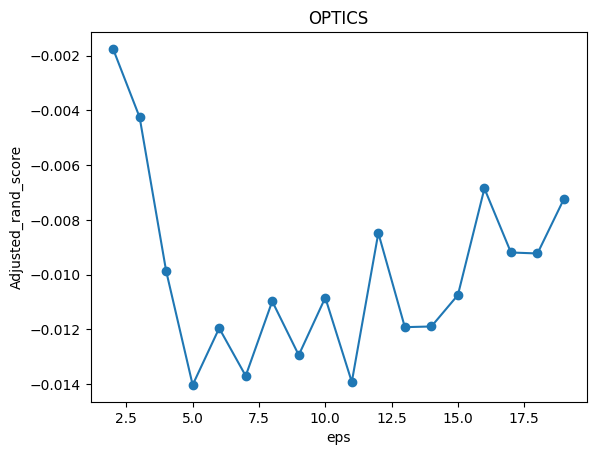

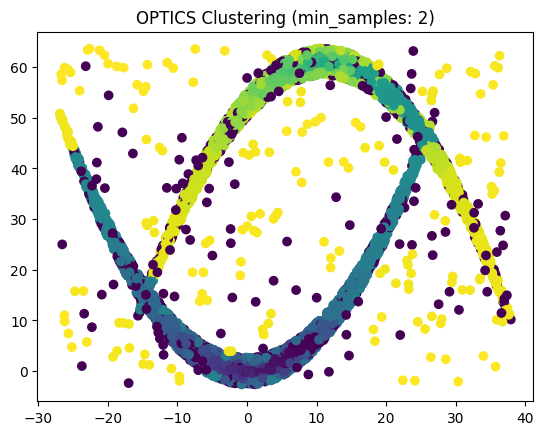

In [8]:
#6. OPTICS + adjusted_rand_score
from sklearn.cluster import OPTICS
from sklearn.metrics import adjusted_rand_score

n_values = range(2, 20)
ari_scores = [] 
best_score = -1
best_n = -1
best_labels = None

for n in n_values:
    clf = OPTICS(min_samples=n)
    labels = clf.fit_predict(d)
    if len(np.unique(labels)) > 1:
        score = adjusted_rand_score(True_labels, labels)
        ari_scores.append(score)
        if score > best_score:
            best_score = score
            best_n = n
            best_labels = labels
    else:
        silhouette_scores.append(-1)

print(f"Оптимальный eps: {best_n}")
print(f"Лучший Silhouette Score: {best_score}")

plt.plot(n_values, ari_scores, marker='o', linestyle='-')
plt.title("OPTICS")
plt.xlabel("eps")
plt.ylabel("Adjusted_rand_score")
plt.show()

plt.title(f"OPTICS Clustering (min_samples: {best_n})")
plt.scatter(x0, x1, c=best_labels)
plt.show()

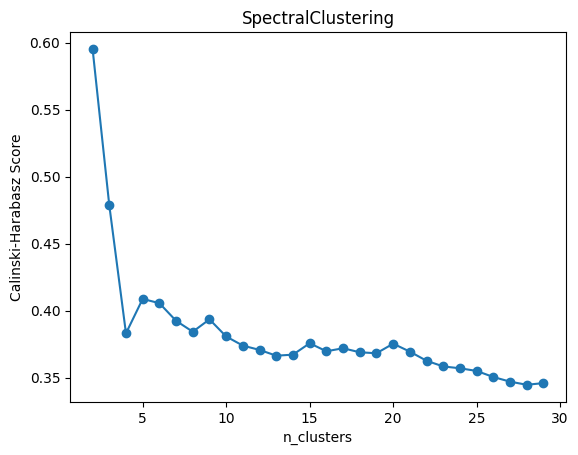

SpectralClustering: оптимальное число кластеров: 2
Лучший Calinski-Harabasz Score: 0.5953600116700066


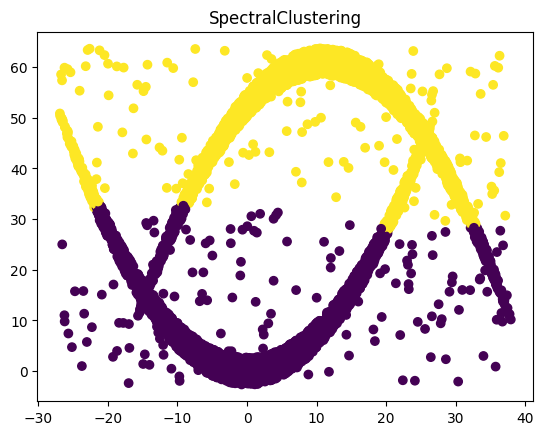

In [9]:
# 7.SpectralClustering + normalized_muture_info_score
# Алгоритм очень долгий, и запускается дольше часа 
# Я проверил :(
# Для его оптимизации добавлю параметр affinity
'''
По умолчанию используется 'rbf' (радиальная базисная функция), которая строит полную матрицу сходств между всеми парами точек.
Это очень ресурсоёмко для больших выборок.

Eсли указать 'nearest_neighbors', матрица сходств строится только для ближайших соседей, а не для всех пар.
Это сильно уменьшает размер графа и ускоряет вычисления, особенно на больших данных.
'''

from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

nmi_scores = []
best_score = -1
best_n = None
best_labels = None

for n in range(2, 30):
    clf = SpectralClustering(n_clusters=n, affinity="nearest_neighbors")
    labels = clf.fit_predict(d)
    score = normalized_mutual_info_score(True_labels, labels)
    nmi_scores.append(score)
    if score > best_score:
        best_score = score
        best_n = n
        best_labels = labels

plt.plot(range(2, 30), nmi_scores, marker='o', linestyle='-')
plt.title("SpectralClustering")
plt.xlabel("n_clusters")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

print(f"SpectralClustering: оптимальное число кластеров: {best_n}")
print(f"Лучший Calinski-Harabasz Score: {best_score}")
plt.title("SpectralClustering")
plt.scatter(x0, x1, c=best_labels)
plt.show()